In [27]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

def plot_percentage(df, x, y):   
    counts = df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    print(counts)
    sns.catplot(x=x, y='percent', hue=y, data=counts, kind='bar')
    plt.show()

df = pd.read_csv('ze_final.csv')

In [28]:
df = df[df['centro'] == 'CETENS']

**Perfil dos Estudantes na Amostra**

- 80% evadiram
- 54% possuem cidade de origem diferente da cidade do campus
- 57% são do sexo feminino
- Idade média dos estudantes é 25

In [29]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['event'].value_counts(normalize=True))

1    0.807496
0    0.192504
Name: event, dtype: float64


In [30]:
idx = (df['time'] == df.groupby('matricula')['time'].transform('max'))

print(df[idx]['is_outra_cidade'].value_counts(normalize=True))

print(df[idx]['sexo'].value_counts(normalize=True))

print(df[idx]['idade'].mean())


1    0.541738
0    0.458262
Name: is_outra_cidade, dtype: float64
1    0.572402
0    0.427598
Name: sexo, dtype: float64
25.018739352640544


**Taxa de evasão é maior para estudantes cuja origem difere da cidade do campus?**

- Taxa de evasão é maior para estudantes cuja cidade de origem difere daquela do campus (81% vs 79%)

   is_outra_cidade  event    percent
0                0      1  79.553903
1                0      0  20.446097
2                1      1  81.761006
3                1      0  18.238994


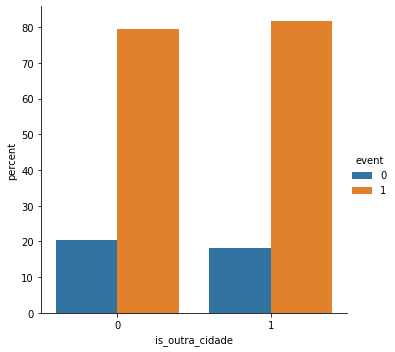

In [31]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

#print(df[idx]['is_outra_cidade'].value_counts(normalize=True))

plot_percentage(df[idx], 'is_outra_cidade', 'event')

**Taxa de evasão é maior para ingressantes no 1o semestre?**

- Evasão é maior entre ingressantes no 2o semestre (86% vs 76%)

1    0.550256
2    0.449744
Name: semestreIngresso, dtype: float64


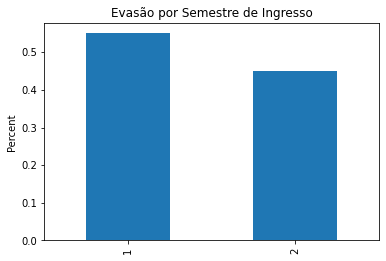

In [32]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')
counts = df.loc[idx, 'semestreIngresso'].value_counts(normalize=True)
print(counts)

ax = counts.plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão por Semestre de Ingresso')
plt.show()


1    0.550256
2    0.449744
Name: semestreIngresso, dtype: float64
   semestreIngresso  event    percent
0                 1      1  76.160991
1                 1      0  23.839009
2                 2      1  86.363636
3                 2      0  13.636364


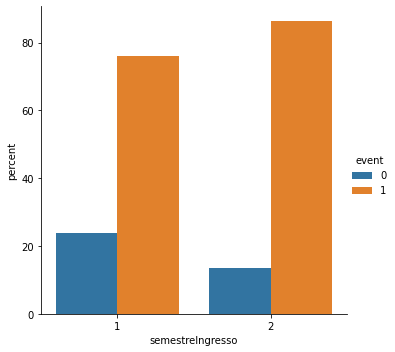

In [33]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['semestreIngresso'].value_counts(normalize=True))

plot_percentage(df[idx], 'semestreIngresso', 'event')

**Taxa de evasão no 2o semestre letivo é maior?**

- Evasão é maior no 2o semestre letivo (89% vs 69%). Por quê? O SISU pode ser uma linha de investigação.

2    0.618143
1    0.381857
Name: semestreLetivo, dtype: float64


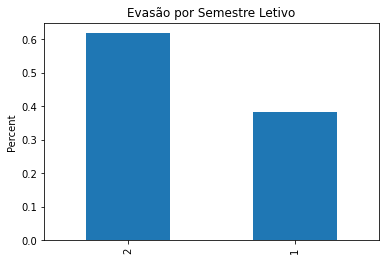

In [34]:
idx = df['event'] == 1

counts = df.loc[idx, 'semestreLetivo'].value_counts(normalize=True)
print(counts)

ax = counts.plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão por Semestre Letivo')
plt.show()


2    0.555366
1    0.444634
Name: semestreLetivo, dtype: float64
   semestreLetivo  event    percent
0               1      1  69.348659
1               1      0  30.651341
2               2      1  89.877301
3               2      0  10.122699


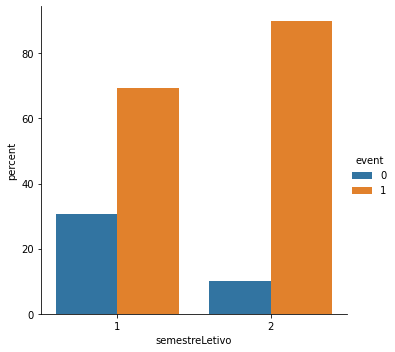

In [35]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['semestreLetivo'].value_counts(normalize=True))

plot_percentage(df[idx], 'semestreLetivo', 'event')

**Há interação entre evasão e o sexo do estudante?**

- Não há evidências de que o sexo afete a evasão (81% vs 80%).
- Com o tempo, há evidências de que a taxa de evasão entre homens cresce após atingir valor mínimio (v-shape)

1    0.575949
0    0.424051
Name: sexo, dtype: float64


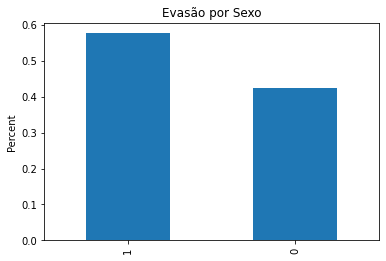

In [36]:
idx = df['event'] == 1

counts = df.loc[idx, 'sexo'].value_counts(normalize=True)
print(counts)

ax = counts.plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão por Sexo')
plt.show()

1    0.572402
0    0.427598
Name: sexo, dtype: float64
   sexo  event    percent
0     0      1  80.079681
1     0      0  19.920319
2     1      1  81.250000
3     1      0  18.750000


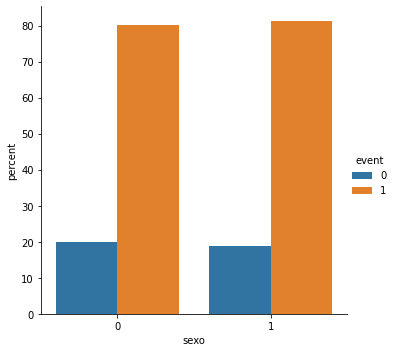

In [37]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['sexo'].value_counts(normalize=True))

plot_percentage(df[idx], 'sexo', 'event')

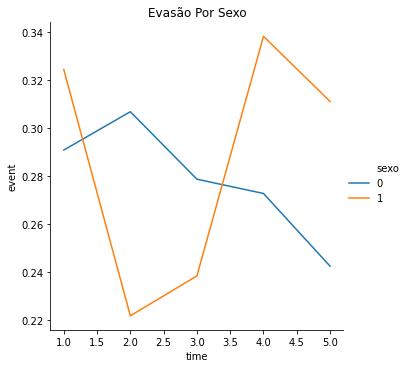

In [38]:
data = df.groupby(['time','sexo']).agg({'event':'mean'}).reset_index()
ax = sns.relplot(x='time', y='event', data=data, hue='sexo',  kind="line")    
ax.set(title='Evasão Por Sexo')    

**Como se comporta a taxa de evasão com o tempo?**

- A taxa de evasão tende a decrescer até o 3o semetre

[Text(0.5, 1.0, 'Evasão Geral')]

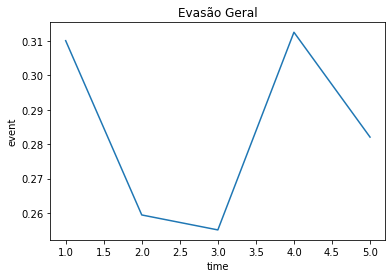

In [39]:
data = df.groupby('time').agg({'event':'mean'}).reset_index()

ax = sns.lineplot(x='time', y='event', data=data)    
ax.set(title='Evasão Geral')

**Há diferenças entre cota e ampla concorrência?**

- Taxa de evasão é maior em estudantes cotistas (82% vs 79%)

0    0.534923
1    0.465077
Name: is_cotista, dtype: float64
   is_cotista  event    percent
0           0      1  79.617834
1           0      0  20.382166
2           1      1  82.051282
3           1      0  17.948718


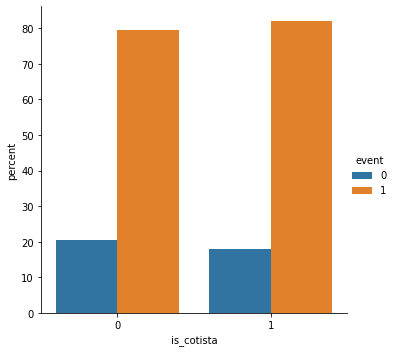

In [40]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['is_cotista'].value_counts(normalize=True))

plot_percentage(df[idx], 'is_cotista', 'event')

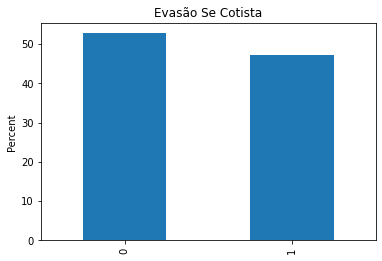

In [41]:
idx = df['event'] == 1

ax = df.loc[idx, 'is_cotista'].value_counts(normalize=True).mul(100).plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão Se Cotista')
plt.show()

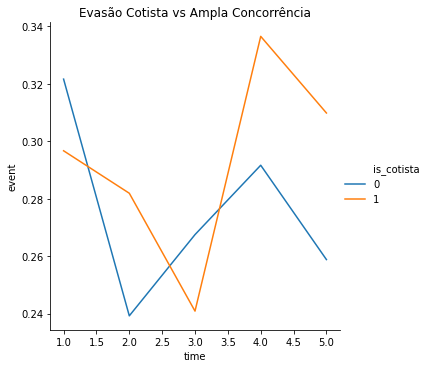

In [42]:
data = df.groupby(['time','is_cotista']).agg({'event':'mean'}).reset_index()
ax = sns.relplot(x='time', y='event', data=data, hue='is_cotista',  kind="line")    
ax.set(title='Evasão Cotista vs Ampla Concorrência')    

**A idade de ingresso afeta a taxa de evasão?**

- Idade parece não explicar a taxa evasão

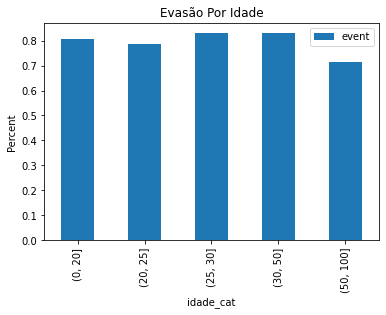

In [43]:
col = 'idade_cat'
df[col] = pd.cut(df.idade, bins=[0,20,25,30,50,100])

idx = df['time'] == df.groupby('matricula')['time'].transform('max')


ax = df[idx].groupby(col).agg({'event':'mean'}).plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão Por Idade')
plt.show()

**Gap (tempo entre o término do ensino médio e o ingresso no curso) afeta a evasão?**

- Gap parece não afetar a taxa de evasão

(0.0, 1.0]      0.241796
(10.0, 37.0]    0.234888
(1.0, 2.0]      0.150259
(2.0, 3.0]      0.103627
(3.0, 4.0]      0.060449
(6.0, 7.0]      0.048359
(5.0, 6.0]      0.039724
(4.0, 5.0]      0.039724
(7.0, 8.0]      0.034542
(8.0, 9.0]      0.025907
(9.0, 10.0]     0.020725
Name: gap_cat, dtype: float64


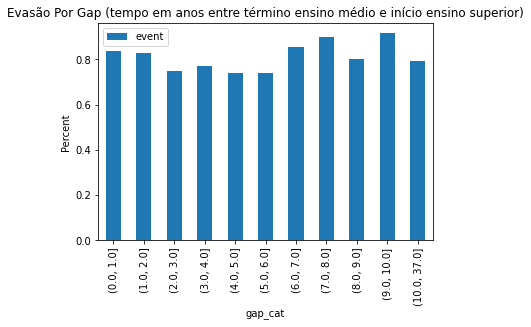

In [44]:
col = 'gap_cat'
df[col] = pd.cut(df.gap, bins=[0,1,2,3,4,5,6,7,8,9,10, df.gap.max()])

idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx][col].value_counts(normalize=True))

ax = df[idx].groupby(col).agg({'event':'mean'}).plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão Por Gap (tempo em anos entre término ensino médio e início ensino superior)')
plt.show()